<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Python BootCamp </h1>
        <a href="https://masters.em-lyon.com/en/msc-in-digital-marketing-data-science">[Emlyon]</a> MSc in Digital Marketing & Data Science (DMDS) <br/>
         September 2022, Paris | © Saeed VARASTEH [RP] | Lucas VILLAIN
    </span>
</div>

<div class="alert-info" style="border-bottom: solid 1px lightgray; background-color:#fff4e3;">
    <img src="images/homework.png" style="height:60px; float:left; padding-right:10px;" />
    <span style="font-weight:bold; color:#db9425">
        <h4 style="padding-top:25px;"> HOMEWORK 07 </h4>
    </span>
</div>

### Marketing Campaign

---

The aim of this exercise is to evaluate your abilities for applying your theoretical knowledge to a practical case in the universe of online advertising.

<h4>Description of the dataset</h4>

The dataset __campaign.csv__ contains a full day of impressions for one particular mobile campaign. Each row corresponds to an impression. The characteristics of each impression are presented in columns and we are more particularly interested in the outcome of the impression: the occurrence of a click or the occurrence of a conversion following a click. The list of columns is classified below by topic:

unixtimestamp of impression <br/>
admantx <span style="color:gray">(external partner which indicate interests of given user)</span>  <br/>
exelate <span style="color:gray">(external partner which indicate interests of given user)</span>  <br/>
browserHeight / browserWidth / deviceHeight / deviceWidth / documentHeight / documentWidth last24hClicks / last24hClicksOnAdvertiser / ... <span style="color:gray">(historic interactions of given user with our inventory)</span> <br/>
browserLanguage / browserName / os <br/>
adSpaceId / adSpacePrimaryThematic <br/>
city <br/>
formatId / containerId / advertiserId / creativeId <br/>
deviceReferrer <br/>
click <br/>
conversion <br/>

__Your Task__

Read and clean the dataset (remove missing values, select relevant columns, and convert column types if necessary).

Explore data, create visualizations, and look for patterns. Try to find the relationship between the features and the occurrence of a click.

Use a statistical method that can identify the factors (features, columns) which seem to be the most influential for a click occurrence.

Comment/document everything.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import pandas as pd
df = pd.read_csv("campaign.csv")
# removing unwanted spaces
df.columns = df.columns.str.replace(" ","")
df.columns

# we dont have any na values in

timestamp                        0
admantx_art_and_entertainment    0
admantx_automotive               0
admantx_business                 0
admantx_careers                  0
                                ..
containerId                      0
advertiserId                     0
creativeId                       0
click                            0
conversion                       0
Length: 135, dtype: int64

---

In [2]:
# we dont have any na values in this dataset except some values like "?" that we will replace in further codes
df.isnull().sum()


timestamp                        0
admantx_art_and_entertainment    0
admantx_automotive               0
admantx_business                 0
admantx_careers                  0
                                ..
containerId                      0
advertiserId                     0
creativeId                       0
click                            0
conversion                       0
Length: 135, dtype: int64

In [4]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962973 entries, 0 to 962972
Data columns (total 135 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    timestamp                            int64  
 1    admantx_art_and_entertainment        float64
 2    admantx_automotive                   float64
 3    admantx_business                     float64
 4    admantx_careers                      float64
 5    admantx_education                    float64
 6    admantx_family_and_parenting         float64
 7    admantx_health_and_fitness           float64
 8    admantx_food_and_drink               float64
 9    admantx_hobbies_and_interests        float64
 10   admantx_home_and_garden              float64
 11   admantx_law_govt_and_politics        float64
 12   admantx_news                         float64
 13   admantx_finance                      float64
 14   admantx_society                      float64
 15   admantx_science

In [5]:
# removing unwanted columns using drop 
df.drop(columns = ["documentHeight","documentWidth","last24hClicksOnAdvertiser","last24hClicksOnContainer","last24hIframeClosingsOnContainer","last24hIframeClosingsOnContainer","last24hIframeClosingsOnFormat","last24hImpressions","last24hImpressionsOnAdvertiser","last24hImpressionsOnFormat","last30minClicks","last30minClicksOnAdvertiser","deviceReferrer","formatId","containerId","advertiserId","creativeId"],inplace=True)
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s') # converting  timestamp value to datetime
df['time'] = df['datetime'].dt.strftime("%H:%M:%S") # filtering the time in hh::mm::ss
df["datetime"].head()
df.head(20)



        
        

,timestamp,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,admantx_hobbies_and_interests,...,adSpaceId,browserLangage,browserName,os,city,adSpacePrimaryThematic,click,conversion,datetime,time
0,1493337601,41.837,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,...,1170,fr,Facebook,iOS,Bourg-les-valence,ART_AND_ENTERTAINMENT,0,0,2017-04-28 00:00:01,00:00:01
1,1493337602,14.431,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,...,616,fr,Mobile Safari,iOS,Joeuf,NEWS,0,0,2017-04-28 00:00:02,00:00:02
2,1493337615,63.729,0.000,0.0,0.0,0.0,5.109,0.000,0.0,0.000,...,5172,fr,Facebook,iOS,Aubervilliers,ART_AND_ENTERTAINMENT,0,0,2017-04-28 00:00:15,00:00:15
3,1493337703,43.345,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,...,1219,fr,Mobile Safari,iOS,Vigneux-sur-seine,ART_AND_ENTERTAINMENT,0,0,2017-04-28 00:01:43,00:01:43
4,1493337828,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,...,5172,fr,Facebook,iOS,Barbey,ART_AND_ENTERTAINMENT,0,0,2017-04-28 00:03:48,00:03:48
5,1493337837,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,...,1191,fr,Mobile Safari,iOS,Strasbourg,ART_AND_ENTERTAINMENT,1,0,2017-04-28 00:03:57,00:03:57
6,1493337861,100.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,...,5172,fr,Mobile Safari,iOS,Tours,ART_AND_ENTERTAINMENT,0,0,2017-04-28 00:04:21,00:04:21
7,1493338170,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,...,1191,fr,Mobile Safari,iOS,Bondy,ART_AND_ENTERTAINMENT,0,0,2017-04-28 00:09:30,00:09:30
8,1493338245,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,...,5506,fr,Facebook,iOS,Aubervilliers,ART_AND_ENTERTAINMENT,0,0,2017-04-28 00:10:45,00:10:45
9,1493338309,0.000,0.000,0.0,0.0,0.0,0.000,0.000,0.0,0.000,...,5172,fr,Facebook,iOS,Courbevoie,ART_AND_ENTERTAINMENT,0,0,2017-04-28 00:11:49,00:11:49


In [6]:
#here we are creating apivot table sum of  last30dImpressions","last30dClicks","conversion" grouped by adSpacePrimaryThematic
ds = df.pivot_table(index=["adSpacePrimaryThematic"], values = ["last30dImpressions","last30dClicks","conversion"], aggfunc=(sum))
ds.head()


#***** HERE OUR ASSUMPTION FOR MONITORING A CAMPAIGN WE NEED ATLEAST 30 DAYS  OF DATA SO WE ARE SELECTING last30dImpressions","last30dClicks"




,conversion,last30dClicks,last30dImpressions
adSpacePrimaryThematic,,,
ART_AND_ENTERTAINMENT,198,7711,84545
AUTOMOTIVE,2,1,23
BUSINESS,8,87,1995
CAREERS,1,31,395
EDUCATION,2,31,518


<AxesSubplot:xlabel='adSpacePrimaryThematic'>

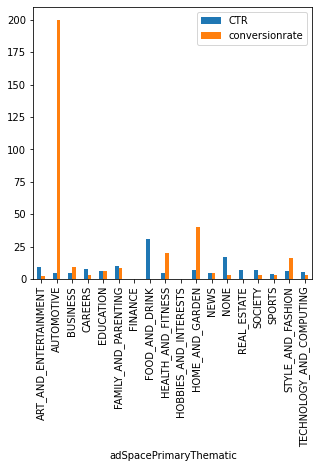

In [7]:
ds["CTR"] = (ds.iloc[:,1]/ds.iloc[:,2])*100 # calculating CTR value  for above table
ds["conversionrate"] = (ds.iloc[:,0]/ds.iloc[:,1])*100 # calculating conversion rate for above table

ds.plot.bar(y=['CTR', 'conversionrate'],figsize=(5, 5),sharex=True) # PLOTIING BAR GRAPH



here we can observe the Conversion rate is for the people who are interested in automotive are converted to customers and also  people who like topics in food/drink also want to try our product. so we can focus our next campaign on this groups

In [8]:
# next we are trying to find any corelation with clicks and conversions based on user third party data
new_df = pd.DataFrame()
for col in df.columns:
    # Split the column name on spaces to get the first word
    first_word = col.split('_')[0]

    # Check if the first word of the column name is similar to the one you want
    if first_word.lower() == 'admantx':
        # If it is, add the column to the new dataframe
        new_df[col] = df[col]
#new_df.head()


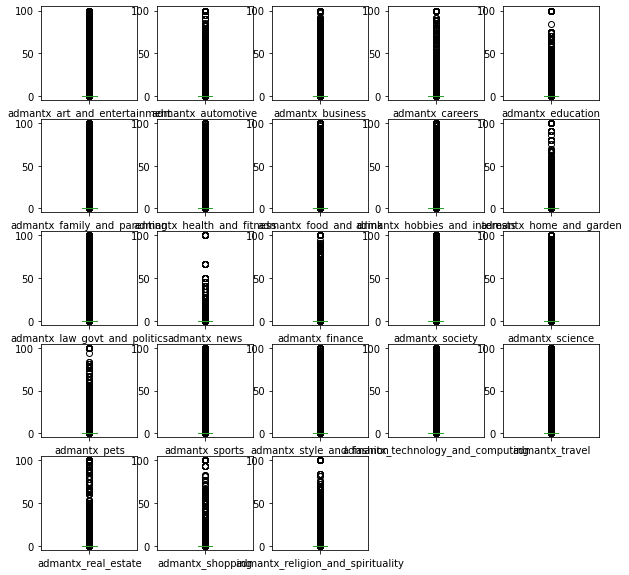

In [9]:
numeric_cols = new_df.select_dtypes(include=['number']).columns
new_df[numeric_cols].plot(subplots=True,  kind='box',layout=(5, 5),figsize=(10, 10))

plt.show()

here we can see all values in admantx are in between 0-100 so  we are assuming its a percentage value

In [10]:
l = [] # here we are creating a new dataframe to get column names
for col in df.columns:
    # Splitting the column name on spaces to get the first word
    first_word = col.split('_')[0]

    # Checking if the first word of the column name is similar to the one you want
    if first_word.lower() == 'admantx':
        # If it is, add the column to the new dataframe
         l.append(col)

l


['admantx_art_and_entertainment',
 'admantx_automotive',
 'admantx_business',
 'admantx_careers',
 'admantx_education',
 'admantx_family_and_parenting',
 'admantx_health_and_fitness',
 'admantx_food_and_drink',
 'admantx_hobbies_and_interests',
 'admantx_home_and_garden',
 'admantx_law_govt_and_politics',
 'admantx_news',
 'admantx_finance',
 'admantx_society',
 'admantx_science',
 'admantx_pets',
 'admantx_sports',
 'admantx_style_and_fashion',
 'admantx_technology_and_computing',
 'admantx_travel',
 'admantx_real_estate',
 'admantx_shopping',
 'admantx_religion_and_spirituality']

In [11]:
df1 = df.groupby(["click", "conversion"]).mean()[l].reset_index() # creating a new dataframe grouping  click and conversion by above list l topics

In [12]:
df1.head() # here we got 3 combinations in clicks and conversions. we need to focus on clicks=1 conversion=0 and clicks=1 conversion=1

,click,conversion,admantx_art_and_entertainment,admantx_automotive,admantx_business,admantx_careers,admantx_education,admantx_family_and_parenting,admantx_health_and_fitness,admantx_food_and_drink,...,admantx_society,admantx_science,admantx_pets,admantx_sports,admantx_style_and_fashion,admantx_technology_and_computing,admantx_travel,admantx_real_estate,admantx_shopping,admantx_religion_and_spirituality
0,0,0,9.171812,0.322440,0.616194,0.256261,0.100531,0.628872,0.763677,0.678594,...,6.195281,1.797000,0.072680,3.565550,1.178101,2.750351,1.966395,0.136692,0.064143,0.099939
1,1,0,9.268982,0.302046,0.500921,0.228856,0.099165,0.629554,0.776128,0.556456,...,5.761716,1.497860,0.047897,2.838992,0.938815,2.253624,1.869867,0.108513,0.064184,0.102875
2,1,1,7.496847,0.122880,0.734448,0.081861,0.115861,0.756237,0.701173,0.424782,...,5.282686,1.008177,0.056974,3.910954,0.744573,3.397405,1.730293,0.003823,0.046494,0.142410


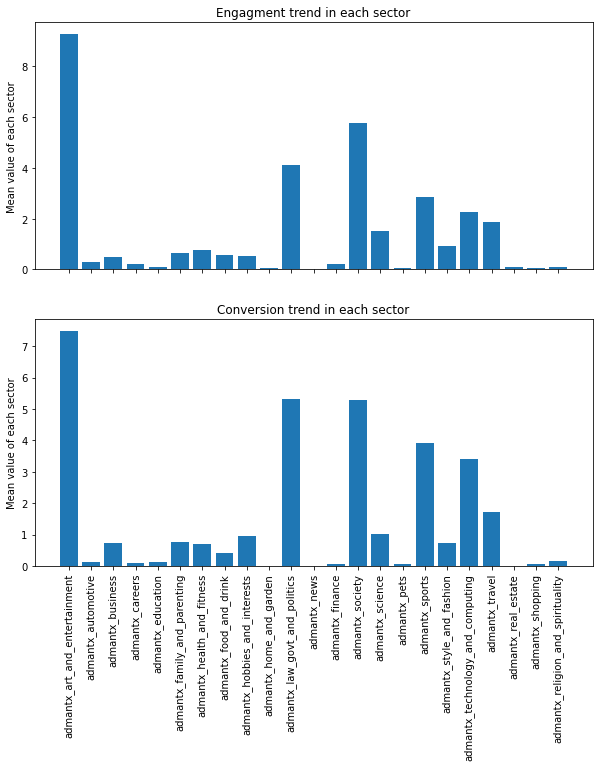

In [26]:
#for click1 conversion 0
g = []
click_conversion10 = df1.iloc[1,2:]
for value in click_conversion10:
    g.append(value)
j = []
# for click 1 conversion 1
click_conversion11 = df1.iloc[2,2:]
for value in click_conversion11:
    j.append(value)

fig, ax = plt.subplots(nrows = 2, ncols = 1,sharex = True,figsize=(10,10))

ax[0].bar(l,g)
ax[1].bar(l,j)
ax[0].set_ylabel("Mean value of each sector")
ax[1].set_ylabel("Mean value of each sector")
ax[0].set_title("Engagment trend in each sector")
ax[1].set_title("Conversion trend in each sector")
plt.xticks(rotation=90)
plt.show()


here we can see engagment trend where comination click 0 conversion 1 and for conversion we can use click 1 combination 1

In [28]:
# likewise the above step we are also checking the trends based on user interested topics
v = []
for col in df.columns:
    # Split the column name on spaces to get the first word
    first_word = col.split('_')[0]

    # Check if the first word of the column name is similar to the one you want
    if first_word.lower() == 'exelate':
        # If it is, add the column to the new dataframe
         v.append(col)
v




['exelate_auto_buyers',
 'exelate_auto_owners',
 'exelate_beauty_and_style',
 'exelate_business',
 'exelate_charitable_donors',
 'exelate_cpg',
 'exelate_diet_and_fitness',
 'exelate_entertainment',
 'exelate_events',
 'exelate_finance',
 'exelate_finance_and_insurance',
 'exelate_general_interest',
 'exelate_hobbies',
 'exelate_home_improvement',
 'exelate_internet_connection_type',
 'exelate_language',
 'exelate_parenting',
 'exelate_pets',
 'exelate_propensity',
 'exelate_purchase_behaviors',
 'exelate_seasonal',
 'exelate_services',
 'exelate_shopping',
 'exelate_sports',
 'exelate_tech_enthusiasts',
 'exelate_tickets',
 'exelate_travel',
 'exelate_tv_viewership']

In [29]:
df2 = df.groupby(["click", "conversion"]).mean()[v].reset_index()
df2

,click,conversion,exelate_auto_buyers,exelate_auto_owners,exelate_beauty_and_style,exelate_business,exelate_charitable_donors,exelate_cpg,exelate_diet_and_fitness,exelate_entertainment,...,exelate_propensity,exelate_purchase_behaviors,exelate_seasonal,exelate_services,exelate_shopping,exelate_sports,exelate_tech_enthusiasts,exelate_tickets,exelate_travel,exelate_tv_viewership
0,0,0,0.015805,0.0,0.012779,0.0,0.0,0.006720,0.0,0.102584,...,0.0,0.012796,0.0,0.0,0.116740,0.052657,0.023887,0.0,0.052866,0.0
1,1,0,0.013318,0.0,0.004867,0.0,0.0,0.004210,0.0,0.097085,...,0.0,0.014452,0.0,0.0,0.098294,0.041470,0.015269,0.0,0.036794,0.0
2,1,1,0.479616,0.0,0.000000,0.0,0.0,0.158273,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.119904,0.0


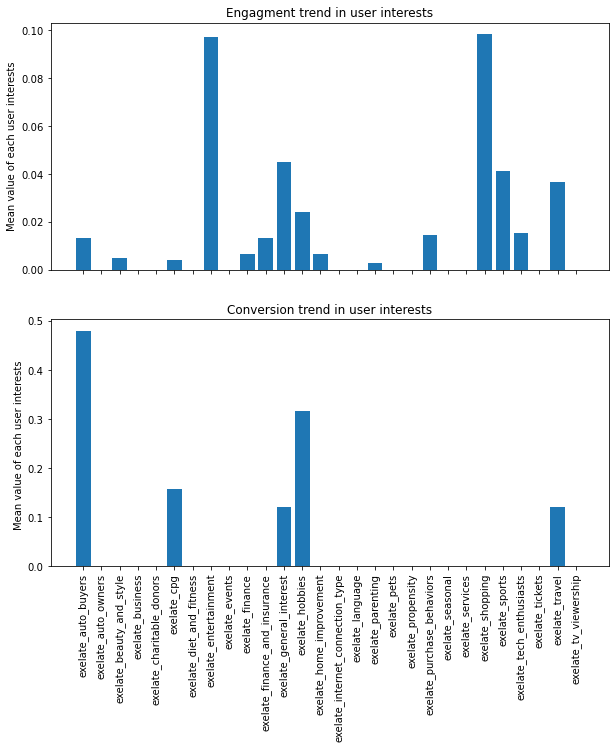

In [33]:
t = []
click_conversion10 = df2.iloc[1,2:]
for value in click_conversion10:
    t.append(value)
i = []
click_conversion11 = df2.iloc[2,2:]
for value in click_conversion11:
    i.append(value)
fig, ax = plt.subplots(nrows = 2, ncols = 1,sharex=True,figsize=(10,10))
ax[0].bar(v,t)
ax[1].bar(v,i)
ax[0].set_ylabel("Mean value of each user interests")
ax[1].set_ylabel("Mean value of each user interests ")
ax[0].set_title("Engagment trend in user interests")
ax[1].set_title("Conversion trend in user interests")
plt.xticks(rotation=90)
plt.show()




In [34]:
# next we are analysing the campaign trends based on the timestamp values
df.datetime.head()


0   2017-04-28 00:00:01
1   2017-04-28 00:00:02
2   2017-04-28 00:00:15
3   2017-04-28 00:01:43
4   2017-04-28 00:03:48
Name: datetime, dtype: datetime64[ns]

In [36]:
#here we are creating a new column by mapping the time with morning,afternnon,night,evening
def timetotimetype(x):
    datetime = str(x)
    if (datetime > "2017-04-28 00:00:00") and (datetime < "2017-04-28 06:00:00") :
        return 'Early Morning'
    if (datetime > "2017-04-28 06:00:00") and (datetime < "2017-04-28 12:00:00") :
        return 'Morning'
    if (datetime > "2017-04-28 12:00:00") and (datetime < "2017-04-28 15:00:00") :
        return 'afternoon'
    if (datetime > "2017-04-28 15:00:00") and (datetime < "2017-04-28 18:00:00") :
        return 'Evening'
    if (datetime > "2017-04-28 18:00:00") and (datetime < "2017-04-28 24:00:00") :
        return 'Night'
df["daytime"] = df["datetime"].apply(timetotimetype)
#applying the above function in the datetime column and creating new column with result

In [37]:
df.daytime.head()

0    Early Morning
1    Early Morning
2    Early Morning
3    Early Morning
4    Early Morning
Name: daytime, dtype: object

In [38]:
time_relation = df.loc[:,["daytime","last30dClicks","last30dImpressions","click","conversion"]]
time_relation.head() # creating new dataframe to analyse the data with required columns

,daytime,last30dClicks,last30dImpressions,click,conversion
0,Early Morning,0,0,0,0
1,Early Morning,0,0,0,0
2,Early Morning,0,0,0,0
3,Early Morning,0,0,0,0
4,Early Morning,0,0,0,0


In [39]:
CTRdf_time= time_relation.pivot_table(index=["daytime"], values = ["last30dImpressions","last30dClicks","conversion"], aggfunc=(sum))
CTRdf_time.head()
# creating pivot table based on the daytime and to find ctr and conversion rate





,conversion,last30dClicks,last30dImpressions
daytime,,,
Early Morning,21,646,10579
Evening,85,2391,34420
Morning,162,4574,66609
Night,95,4020,52104
afternoon,54,1360,18657


Text(0.5, 1.0, 'CTR and Conversion Rate by Time of Day')

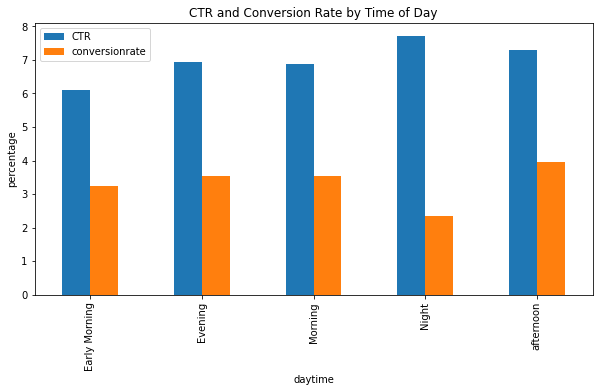

In [41]:
CTRdf_time["CTR"] = (CTRdf_time.iloc[:,1]/CTRdf_time.iloc[:,2])*100
CTRdf_time["conversionrate"] = (CTRdf_time.iloc[:,0]/CTRdf_time.iloc[:,1])*100
# adding new columns with CTR and conversion rate
CTRdf_time.plot.bar(y=['CTR', 'conversionrate'], ylabel = "percentage",figsize=(10, 5),sharex=True)
plt.title("CTR and Conversion Rate by Time of Day")




here from the data we can analyse we need to focus our ad campign in afternoon time

In [42]:
# next we are analysing the data based on city so removing the unwanted columns
df["city"].replace("?", "Unknown", inplace=True)


In [46]:
City_ctr= df.pivot_table(index=["city"], values = ["last30dImpressions","last30dClicks","conversion"], aggfunc=(sum))

City_ctr.drop(City_ctr[City_ctr["conversion"] == 0].index, inplace=True)
City_ctr = City_ctr.sort_values("conversion",ascending= False)


# here we are creating a pivot table gruouping by city and sorting based on conversion value

In [47]:

City_ctr.drop(columns ="last30dImpressions",inplace=True)
City_ctr.head(12) # here you can see 12 cities with higher conversion rate

,conversion,last30dClicks
city,,
Paris,138,3213
Orange,82,417
Aubervilliers,56,503
Courbevoie,30,234
Latresne,22,110
Garches,19,185
Mions,13,91
Toulouse,11,227
Villeurbanne,5,103


In [49]:
City_ref_conversion = City_ctr.head(12).sort_values("conversion",ascending = True)
City_ref_conversion.head(12)



,conversion,last30dClicks
city,,
Boulogne-billancourt,2,60
Clichy,2,61
Strasbourg,4,129
Villeurbanne,5,103
Toulouse,11,227
Mions,13,91
Garches,19,185
Latresne,22,110
Courbevoie,30,234


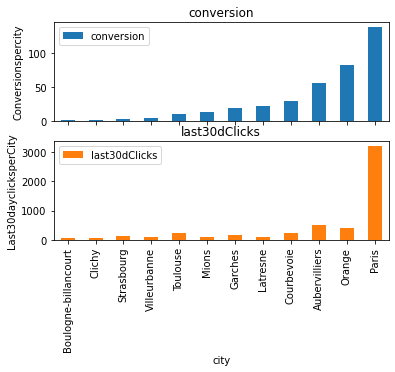

In [50]:
axes= City_ref_conversion.plot.bar(y=["conversion","last30dClicks"],subplots=True,sharex=True)
for ax, label in zip(axes, ['Conversionspercity', 'Last30dayclicksperCity']):
    ax.set_ylabel(label)

here we can analyse that we need to be more focus in the cities like Paris, Orange,Aubervillers which have good conversions and engagment

In [55]:
Browserdetails = df.iloc[:,112:115]
Browserdetails # we are creating a new dataframe with required details

,browserLangage,browserName,os
0,fr,Facebook,iOS
1,fr,Mobile Safari,iOS
2,fr,Facebook,iOS
3,fr,Mobile Safari,iOS
4,fr,Facebook,iOS
...,...,...,...
962968,fr,Facebook,iOS
962969,fr,Facebook,iOS
962970,fr,Mobile Safari,iOS
962971,fr,Facebook,iOS


In [56]:
Browserdetails.rename(columns={
        'browserLangage': 'BrowserLanguage','browserName':'BrowserName',
        'os': 'OS_Type'
    },
    inplace=True) # renaming the columns

In [57]:
Browserdetails["conversion"] = df["conversion"] #adding the conversion columns

In [58]:
Browserdetails["BrowserName"] = Browserdetails.BrowserName.astype('category')
Browserdetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962973 entries, 0 to 962972
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   BrowserLanguage  962973 non-null  object  
 1   BrowserName      962973 non-null  category
 2   OS_Type          962973 non-null  object  
 3   conversion       962973 non-null  int64   
dtypes: category(1), int64(1), object(2)
memory usage: 23.0+ MB


In [59]:
Browserdetails1 = Browserdetails.groupby(["BrowserName","BrowserLanguage"]).sum()["conversion"].sort_values(ascending=False)
Browserdetails1.head() # grouping with browser language and name to get each sum of conversion

BrowserName    BrowserLanguage
Mobile Safari  fr                 199
Facebook       fr                 192
other          fr                  21
               en                   2
Facebook       en                   1
Name: conversion, dtype: int64

here we can analyse safari and facebook browser in french languaghe have maximum conversions


In [60]:
# create a list of the column names in the new dataframe to analyse the data
columns = ['click','conversion','browserHeight', 'browserWidth', 'deviceHeight', 'deviceWidth','last30dClicks','last30dImpressions','browserLangage','browserName','city','time']

# create a new dataframe by selecting the columns from the original dataframe
new_df = df[columns]
corr_click = new_df.corr()['click'].reset_index(name = 'corr_click')
corr_click = corr_click.sort_values(by=['corr_click'],ascending = False).head(10)
corr_click
# corr click helps to relate the other columns with the column click 


,index,corr_click
0,click,1.000000
1,conversion,0.063015
6,last30dClicks,0.020147
7,last30dImpressions,-0.002115
3,browserWidth,-0.087190
2,browserHeight,-0.089015
5,deviceWidth,-0.137756
4,deviceHeight,-0.137924


<AxesSubplot:>

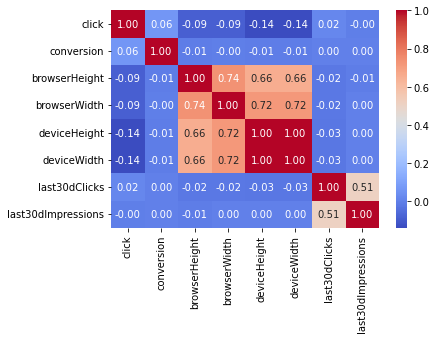

In [63]:
#next we are creating corr plot with the above values and find the relation
corr = new_df.corr()

# Plot a heatmap showing the correlation between the columns
sns.heatmap(corr, annot=True,cmap='coolwarm',fmt='.2f')
# here we can the column comnbinatins which more influence to click is in red color/ light red color

In [62]:

# create a list of the column names you want to include in the new dataframe
columns1 = ['click','admantx_art_and_entertainment','admantx_automotive','admantx_business', 'admantx_careers', 'admantx_education', 'admantx_family_and_parenting','admantx_health_and_fitness','admantx_food_and_drink','admantx_hobbies_and_interests','admantx_home_and_garden','admantx_law_govt_and_politics','admantx_news','admantx_finance','admantx_society','admantx_science','admantx_pets','admantx_sports','admantx_style_and_fashion','admantx_technology_and_computing','admantx_travel','admantx_real_estate','admantx_shopping','admantx_religion_and_spirituality']

# create a new dataframe by selecting the columns from the original dataframe
new_df2 = df[columns1]
corr_click1 = new_df2.corr()['click'].reset_index(name = 'corr_click')
corr_click1 = corr_click1.sort_values(by=['corr_click'],ascending = False).head(10)
corr_click1



,index,corr_click
0,click,1.000000
1,admantx_art_and_entertainment,0.001082
7,admantx_health_and_fitness,0.000573
23,admantx_religion_and_spirituality,0.000446
6,admantx_family_and_parenting,0.000068
22,admantx_shopping,-0.000006
5,admantx_education,-0.000196
9,admantx_hobbies_and_interests,-0.001284
2,admantx_automotive,-0.001669
10,admantx_home_and_garden,-0.002292


this is corrclick for user interests.